# Ejercicio Ridge, Lasso y ElasticNet
Para este ejercicio vas a trabajar con datos de ventas de una empresa que fabrica muebles en España. Esta empresa es una Pyme que demanda conocer de antemano qué ingresos va a tener cada mes, ya que necesita pedir un anticipio a su entidad financiera de cara a poder abastecerse de materia prima al comenzar el mes. Como desconoce cuánto tiene que pedir, tira al alza y acaba pagando muchos intereses. El objetivo es reducir estos gastos.

En las bases de datos de la empresa constan todos los gastos en publicidad y ventas, para cada uno de los meses desde su fundación (hace más de 15 años).

Dado que los presupuestos de marketing se cierran al principio de cada mes, la empresa necesita un modelo predictivo que le anticipe las ventas que conseguirá a final de mes en función de los gastos que realizará en marketing.

Para ello tendrás que utilizar tanto modelos de regresión normales, como regularizados.

1. Carga los datos y realiza un pequeño análisis exploratorio. Mira a ver cómo se relaciona las ventas con el resto de variables.
2. Crea varios modelos y modifica los hiperparámetros necesarios para mejorar el performance del modelo.
3. Interpreta los resultados. Traduce a una fórmula tu mejor modelo (escribir la fórmula simplemente). ¿Cuánto cambian las ventas si aumentamos la inversión en radio un punto más? ¿Y si aumentamos la inversión en TV o periódicos?

## Import libraries 

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Exploratory Data Analysis 

In [37]:
# Lectura datos, relación variables, mapas de correlación...

df = pd.read_csv('data/Advertising.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newpaper    200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [39]:
df.head()

,Unnamed: 0,TV,radio,newpaper,sales
0,0,230.1,37.8,69.2,22100.0
1,1,44.5,39.3,45.1,10400.0
2,2,17.2,45.9,69.3,9300.0
3,3,151.5,41.3,58.5,18500.0
4,4,180.8,10.8,58.4,12900.0


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newpaper    200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [42]:
df.drop(columns='Unnamed: 0', inplace=True)

KeyError: "['Unnamed: 0'] not found in axis"

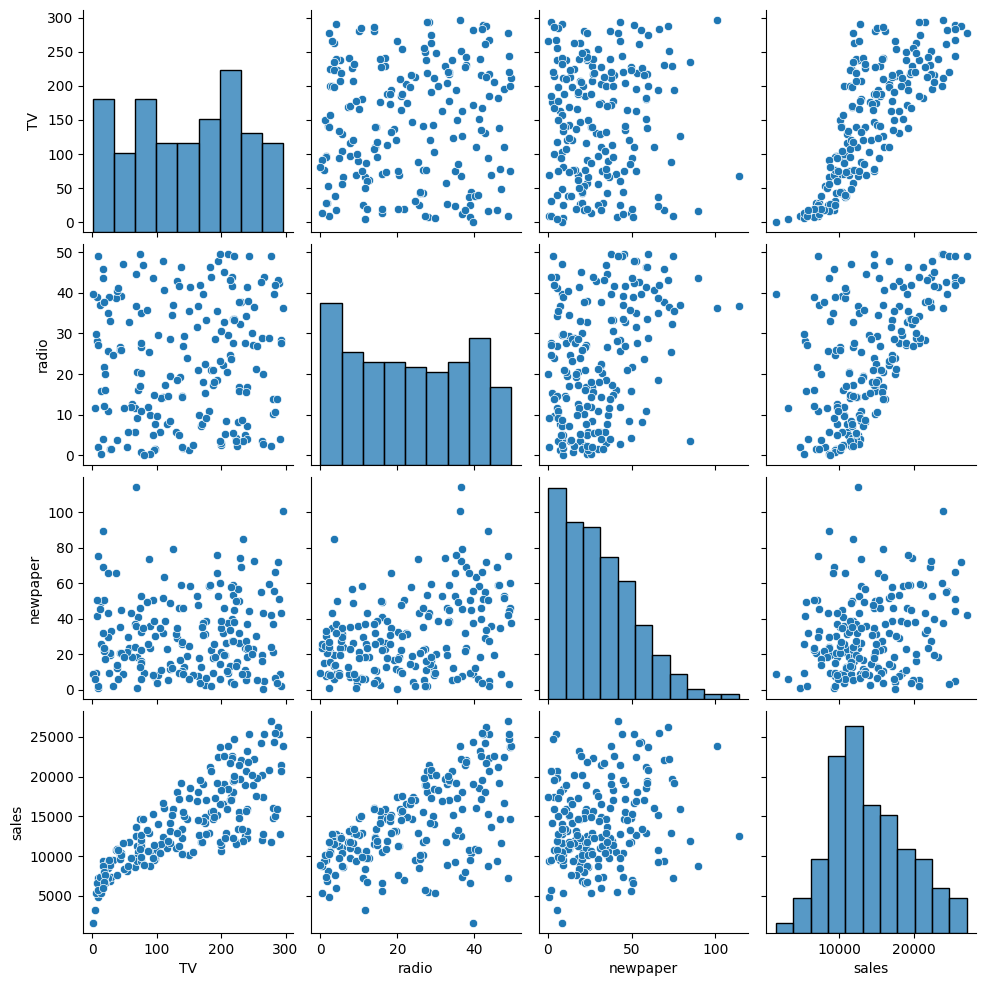

In [43]:
sns.pairplot(df);


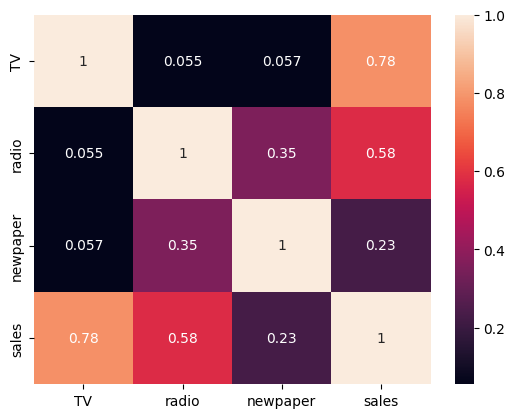

In [44]:
sns.heatmap(df.corr(numeric_only=True), annot=True);

## Modelado

In [237]:
# Manipulación datasets, entrenamiento, evaluación, nuevas iteraciones... Prueba modelos sin y con regularización.

In [46]:
x = df[['TV','radio']]
y = df['sales']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 42)  

linear_model = LinearRegression()

linear_model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [48]:
predictions_train = linear_model.predict(X_train)

In [49]:
print('MAE:', mean_absolute_error(y_train, predictions_train))
print('MSE:', mean_squared_error(y_train, predictions_train))
print('RMSE:', np.sqrt(mean_squared_error(y_train, predictions_train)))

MAE: 1196.5003043815418
MSE: 2707790.796862016
RMSE: 1645.5366288424016


In [50]:
predictions = linear_model.predict(X_test)

In [51]:
print('MAE:', mean_absolute_error(y_test, predictions))
print('MSE:', mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions)))

MAE: 1444.302313822758
MSE: 3137948.009068354
RMSE: 1771.4254173033519


### Modelos Polinómicos

In [60]:
x = df[['TV','radio']]
y = df['sales'] 

#Training 

poly_feats = PolynomialFeatures(degree = 2)
poly_feats.fit(x)
X_poly = poly_feats.transform(x)

X_train, X_test, y_train, y_test = train_test_split(X_poly,y, test_size = 0.2, random_state=42)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

predictions_poly_2_train = lin_reg.predict(X_train)

print('Train poly 2 :')
print("MAE:", mean_absolute_error(y_train, predictions_poly_2_train))
print("MSE:", mean_squared_error(y_train, predictions_poly_2_train))
print("RMSE:", np.sqrt(mean_squared_error(y_train, predictions_poly_2_train)))
print("r2_score train", lin_reg.score(X_train, y_train))
print("r2_score test",lin_reg.score(X_train, y_train))


#Predicciones

poly_feats = PolynomialFeatures(degree = 2)
poly_feats.fit(x)
X_poly = poly_feats.transform(x)

X_train, X_test, y_train, y_test = train_test_split(X_poly,y, test_size = 0.2, random_state=42)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

predictions_poly_2 = lin_reg.predict(X_test)
print()
print('Test poly 2 :')
print("MAE:", mean_absolute_error(y_test, predictions_poly_2))
print("MSE:", mean_squared_error(y_test, predictions_poly_2))
print("RMSE:", np.sqrt(mean_squared_error(y_test, predictions_poly_2)))
print("r2_score train", lin_reg.score(X_train, y_train))
print("r2_score test",lin_reg.score(X_test, y_test))

Train poly 2 :
MAE: 400.9658544297789
MSE: 382113.2878424326
RMSE: 618.1531265329268
r2_score train 0.9852672114186733
r2_score test 0.9852672114186733

Test poly 2 :
MAE: 493.48202982660104
MSE: 364155.8727915492
RMSE: 603.4532896517751
r2_score train 0.9852672114186733
r2_score test 0.9884627879931591


In [62]:
x = df[['TV','radio']]
y = df['sales'] 

#Train

poly_feats = PolynomialFeatures(degree = 3)
poly_feats.fit(x)
X_poly = poly_feats.transform(x)

X_train, X_test, y_train, y_test = train_test_split(X_poly,y, test_size = 0.2, random_state=42)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

predictions_poly_3_train = lin_reg.predict(X_train)

print('Train poly 3 :')
print("MAE:", mean_absolute_error(y_train, predictions_poly_3_train))
print("MSE:", mean_squared_error(y_train, predictions_poly_3_train))
print("RMSE:", np.sqrt(mean_squared_error(y_train, predictions_poly_3_train)))
print("r2_score train", lin_reg.score(X_train, y_train))
print("r2_score test",lin_reg.score(X_train, y_train))




poly_feats = PolynomialFeatures(degree = 3)
poly_feats.fit(x)
X_poly = poly_feats.transform(x)

X_train, X_test, y_train, y_test = train_test_split(X_poly,y, test_size = 0.2, random_state=42)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

predictions_poly_3 = lin_reg.predict(X_test)

print()
print('Test poly 3 :')
print("MAE:", mean_absolute_error(y_test, predictions_poly_3))
print("MSE:", mean_squared_error(y_test, predictions_poly_3))
print("RMSE:", np.sqrt(mean_squared_error(y_test, predictions_poly_3)))
print("r2_score train", lin_reg.score(X_train, y_train))
print("r2_score test",lin_reg.score(X_test, y_test))

Train poly 3 :
MAE: 312.9449708603843
MSE: 256202.400997063
RMSE: 506.1644011554576
r2_score train 0.990121841014138
r2_score test 0.990121841014138

Test poly 3 :
MAE: 335.8526633105479
MSE: 178710.43029618094
RMSE: 422.7415644293579
r2_score train 0.990121841014138
r2_score test 0.9943380835619777


In [65]:
x = df[['TV','radio']]
y = df['sales'] 

#Train

poly_feats = PolynomialFeatures(degree = 4)
poly_feats.fit(x)
X_poly = poly_feats.transform(x)

X_train, X_test, y_train, y_test = train_test_split(X_poly,y, test_size = 0.2, random_state=42)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

predictions_poly_4_train = lin_reg.predict(X_train)

print('Train poly 4 :')
print("MAE:", mean_absolute_error(y_train, predictions_poly_4_train))
print("MSE:", mean_squared_error(y_train, predictions_poly_4_train))
print("RMSE:", np.sqrt(mean_squared_error(y_train, predictions_poly_4_train)))
print("r2_score train", lin_reg.score(X_train, y_train))
print("r2_score test",lin_reg.score(X_train, y_train))

#TEST


poly_feats = PolynomialFeatures(degree = 4)
poly_feats.fit(x)
X_poly = poly_feats.transform(x)

X_train, X_test, y_train, y_test = train_test_split(X_poly,y, test_size = 0.2, random_state=42)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

predictions_poly_4 = lin_reg.predict(X_test)
print()
print('test poly 4 :')
print("MAE:", mean_absolute_error(y_test, predictions_poly_4))
print("MSE:", mean_squared_error(y_test, predictions_poly_4))
print("RMSE:", np.sqrt(mean_squared_error(y_test, predictions_poly_4)))
print("r2_score train", lin_reg.score(X_train, y_train))
print("r2_score test",lin_reg.score(X_test, y_test))

Train poly 4 :
MAE: 293.28455856885205
MSE: 188236.3384426682
RMSE: 433.8621191607631
r2_score train 0.9927423456188668
r2_score test 0.9927423456188668

test poly 4 :
MAE: 356.98231534917096
MSE: 191937.12727367098
RMSE: 438.1062967747336
r2_score train 0.9927423456188668
r2_score test 0.9939190344168692


In [78]:
x = df[['TV','radio']]
y = df['sales'] 

#Train

poly_feats = PolynomialFeatures(degree = 3)
poly_feats.fit(x)
X_poly = poly_feats.transform(x)

X_train, X_test, y_train, y_test = train_test_split(X_poly,y, test_size = 0.2, random_state=42)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

predictions_poly_3_train = lin_reg.predict(X_train)

print('Train poly 3 :')
print("MAE:", mean_absolute_error(y_train, predictions_poly_3_train))
print("MSE:", mean_squared_error(y_train, predictions_poly_3_train))
print("RMSE:", np.sqrt(mean_squared_error(y_train, predictions_poly_3_train)))
print("r2_score train", lin_reg.score(X_train, y_train))
print("r2_score test",lin_reg.score(X_train, y_train))




poly_feats = PolynomialFeatures(degree = 3)
poly_feats.fit(x)
X_poly = poly_feats.transform(x)

X_train, X_test, y_train, y_test = train_test_split(X_poly,y, test_size = 0.2, random_state=42)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

predictions_poly_3 = lin_reg.predict(X_test)

print()
print('Test poly 3 :')
print("MAE:", mean_absolute_error(y_test, predictions_poly_3))
print("MSE:", mean_squared_error(y_test, predictions_poly_3))
print("RMSE:", np.sqrt(mean_squared_error(y_test, predictions_poly_3)))
print("r2_score train", lin_reg.score(X_train, y_train))
print("r2_score test",lin_reg.score(X_test, y_test))


from sklearn.linear_model import Ridge

ridgeR = Ridge(alpha = 1)
ridgeR.fit(X_train, y_train)

print()
print("Train MSE sin regularización:", round(mean_squared_error(y_train, lin_reg.predict(X_train)),2))
print("Test MSE sin regularización:", round(mean_squared_error(y_test, lin_reg.predict(X_test)),2))

print("Train MSE con regularización:", round(mean_squared_error(y_train, ridgeR.predict(X_train)),2))
print("Test MSE con regularización:", round(mean_squared_error(y_test, ridgeR.predict(X_test)),2))
# print("Test RMSE:", np.sqrt(metrics.mean_squared_error(y_test, ridgeR.predict(X_test))))

Train poly 3 :
MAE: 312.9449708603843
MSE: 256202.400997063
RMSE: 506.1644011554576
r2_score train 0.990121841014138
r2_score test 0.990121841014138

Test poly 3 :
MAE: 335.8526633105479
MSE: 178710.43029618094
RMSE: 422.7415644293579
r2_score train 0.990121841014138
r2_score test 0.9943380835619777

Train MSE sin regularización: 256202.4
Test MSE sin regularización: 178710.43
Train MSE con regularización: 256202.45
Test MSE con regularización: 178708.41


In [92]:
x = df[['TV','radio']]
y = df['sales'] 

#Train

poly_feats = PolynomialFeatures(degree = 4)
poly_feats.fit(x)
X_poly = poly_feats.transform(x)

X_train, X_test, y_train, y_test = train_test_split(X_poly,y, test_size = 0.2, random_state=42)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

predictions_poly_4_train = lin_reg.predict(X_train)

print('Train poly 4 :')
print("MAE:", mean_absolute_error(y_train, predictions_poly_4_train))
print("MSE:", mean_squared_error(y_train, predictions_poly_4_train))
print("RMSE:", np.sqrt(mean_squared_error(y_train, predictions_poly_4_train)))
print("r2_score train", lin_reg.score(X_train, y_train))
print("r2_score test",lin_reg.score(X_train, y_train))

#TEST


poly_feats = PolynomialFeatures(degree = 4)
poly_feats.fit(x)
X_poly = poly_feats.transform(x)

X_train, X_test, y_train, y_test = train_test_split(X_poly,y, test_size = 0.2, random_state=42)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

predictions_poly_4 = lin_reg.predict(X_test)
print()
print('test poly 4 :')
print("MAE:", mean_absolute_error(y_test, predictions_poly_4))
print("MSE:", mean_squared_error(y_test, predictions_poly_4))
print("RMSE:", np.sqrt(mean_squared_error(y_test, predictions_poly_4)))
print("r2_score train", lin_reg.score(X_train, y_train))
print("r2_score test",lin_reg.score(X_test, y_test))




from sklearn.linear_model import Ridge

ridgeR = Ridge(alpha = 1000)
ridgeR.fit(X_train, y_train)

print()
print("Train MSE sin regularización:", round(mean_squared_error(y_train, lin_reg.predict(X_train)),2))
print("Test MSE sin regularización:", round(mean_squared_error(y_test, lin_reg.predict(X_test)),2))

print("Train MSE con regularización:", round(mean_squared_error(y_train, ridgeR.predict(X_train)),2))
print("Test MSE con regularización:", round(mean_squared_error(y_test, ridgeR.predict(X_test)),2))
# print("Test RMSE:", np.sqrt(metrics.mean_squared_error(y_test, ridgeR.predict(X_test))))

Train poly 4 :
MAE: 293.28455856885205
MSE: 188236.3384426682
RMSE: 433.8621191607631
r2_score train 0.9927423456188668
r2_score test 0.9927423456188668

test poly 4 :
MAE: 356.98231534917096
MSE: 191937.12727367098
RMSE: 438.1062967747336
r2_score train 0.9927423456188668
r2_score test 0.9939190344168692

Train MSE sin regularización: 188236.34
Test MSE sin regularización: 191937.13
Train MSE con regularización: 216189.56
Test MSE con regularización: 184851.95


c:\Users\Andre\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\_lib\_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=1.40431e-18): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)


## Resultados

In [ ]:
# Interpreta, resume y destaca los puntos importantes de los resultados.
El 

In [270]:
# Utiliza todas las celdas que necesites...